# Install dependencies

In [1]:
# Install dependencies
try:
    from ceda_datapoint import DataPointClient
except ImportError as exc:
    !pip install ceda-datapoint
    from ceda_datapoint import DataPointClient

# Create a client instance - for searching the CEDA STAC catalog

In [2]:
client = DataPointClient(org="CEDA")
client

<DataPointClient: CEDA-234879>
 - url: https://api.stac.ceda.ac.uk
 - organisation: CEDA

# Basic search
Perform a basic search of the CMIP6 climate model simulations dataset, filtering on experiment, activity and institution:

In [3]:
search_basic = client.search(
    collections=['cmip6'],
    query=[
        'cmip6:experiment_id=ssp585',
        'cmip6:activity_id=ScenarioMIP',
        'cmip6:institution_id=KIOST',
    ],
    max_items = 10
)

# Collect up the "cloud assets" connected with the search results
This method collects up the cloud assets, which may be Zarr, NetCDF or Kerchunk files. The latter represent an index that points to content within other files (typically NetCDF).

The files themselves can be served over a variety of protocols, including:

POSIX: local file system
HTTP(S): old-fashioned HTTP(S) access
S3: using Amazon's S3 protocol (over HTTP(S))
We identify them and then list the related products.

In [4]:
cluster = search_basic.collect_cloud_assets()
cluster

<DataPointCluster: CEDA-234879-206989-206938 (Datasets: 10)>
 - url: https://api.stac.ceda.ac.uk
 - organisation: CEDA
 - search_terms: {'collections': ['cmip6'], 'query': ['cmip6:experiment_id=ssp585', 'cmip6:activity_id=ScenarioMIP', 'cmip6:institution_id=KIOST'], 'max_items': 10}
 - products: 10
Products:
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.vas.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.uas.gr1.v20210319-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.sfcWind.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.rsus.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.rsds.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.rlus.gr1.v20191106-r

In [5]:
product = cluster[2]
ds = product.open_dataset()

In [6]:
dir(product)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_mapper',
 '_multiple_options',
 '_open_cfa',
 '_open_cog',
 '_open_kerchunk',
 '_open_zarr',
 '_set_visibility',
 'attributes',
 'bbox',
 'cloud_format',
 'collection',
 'end_datetime',
 'get_attribute',
 'help',
 'href',
 'id',
 'info',
 'meta',
 'open_dataset',
 'stac_attributes',
 'start_datetime',
 'units',
 'variables']

# Select a product and use it (as an Xarray Dataset)
A product has an .open_dataset() method, which loads it (lazily) into an xarray.Dataset, making it ready for use in the Python session.

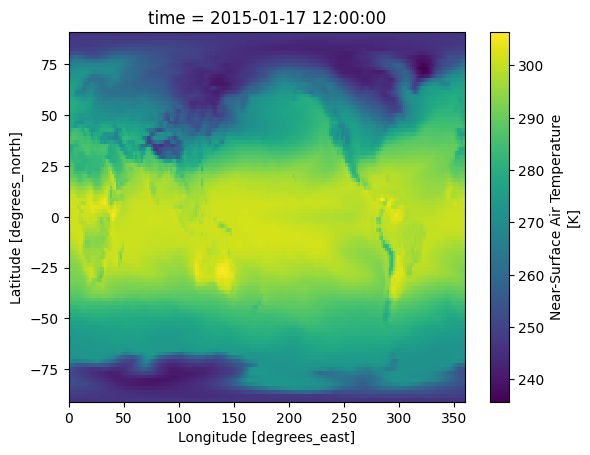

In [7]:
tas_product = None

for product in cluster:
    if "tas" in product.id:
        tas_product = product
        break

if tas_product:
    ds = tas_product.open_dataset()
    ds.tas.sel(time="2015-01-17 12:00:00").squeeze().plot()
else:
    print("tas variable not found in cluster")

In [8]:
for product in cluster:
    if "tas" in product.id:
        print(product.id)
        print(product.stac_attributes.keys())
        print(product.stac_attributes)
        break

CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file
dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])
{'type': 'Feature', 'stac_version': '1.1.0', 'stac_extensions': ['https://stac-extensions.github.io/cmip6/v1.0.0/schema.json'], 'id': 'CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'geometry': {'type': 'Polygon', 'coordinates': [[[-179.0625, -90.0], [179.0625, -90.0], [179.0625, 90.0], [-179.0625, 90.0], [-179.0625, -90.0]]]}, 'bbox': [-179.0625, -90.0, 179.0625, 90.0], 'links': [{'rel': 'self', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6/items/CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'type': 'application/geo+json'}, {'rel': 'parent', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json'}, {'rel': 'collection', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json', 

In [9]:
for product in cluster:
    print(f"\nProduct ID: {product.id}")
    print("Available stac_attributes keys:", product.stac_attributes.keys())


Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.vas.gr1.v20191106-reference_file
Available stac_attributes keys: dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])

Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.uas.gr1.v20210319-reference_file
Available stac_attributes keys: dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])

Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file
Available stac_attributes keys: dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])

Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.sfcWind.gr1.v20191106-reference_file
Available stac_attributes keys: dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])

Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.s

In [10]:
tas_products = [p for p in cluster if "tas" in p.id]

for p in tas_products:
    print(p.id)

CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file


In [11]:
# Access metadata for the selected 'tas' product
if tas_product:
    metadata = tas_product.stac_attributes
    print("STAC Metadata for Product ID:", tas_product.id)
    print("STAC Attributes:", metadata)

    # If you'd like to see more details or other attributes:
    for key, value in metadata.items():
        print(f"{key}: {value}")
else:
    print("tas product not found.")

STAC Metadata for Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file
STAC Attributes: {'type': 'Feature', 'stac_version': '1.1.0', 'stac_extensions': ['https://stac-extensions.github.io/cmip6/v1.0.0/schema.json'], 'id': 'CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'geometry': {'type': 'Polygon', 'coordinates': [[[-179.0625, -90.0], [179.0625, -90.0], [179.0625, 90.0], [-179.0625, 90.0], [-179.0625, -90.0]]]}, 'bbox': [-179.0625, -90.0, 179.0625, 90.0], 'links': [{'rel': 'self', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6/items/CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'type': 'application/geo+json'}, {'rel': 'parent', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json'}, {'rel': 'collection', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json', 'title': 'CMIP6'}, {'rel': 'root', 'href': 'https://api.s

In [12]:
if tas_product:
    # Extract STAC metadata fields
    metadata = tas_product.stac_attributes
    item_metadata = {
        "ID": tas_product.id,
        "Type": metadata.get("type"),
        "STAC Version": metadata.get("stac_version"),
        "Collection": metadata.get("collection"),
        "Links": metadata.get("links"),
        "Bounding Box": metadata.get("bbox"),
        "Geometry": metadata.get("geometry")
    }

    # Display metadata
    for key, value in item_metadata.items():
        print(f"{key}: {value}")
else:
    print("tas product not found.")

ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file
Type: Feature
STAC Version: 1.1.0
Collection: cmip6
Links: [{'rel': 'self', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6/items/CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'type': 'application/geo+json'}, {'rel': 'parent', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json'}, {'rel': 'collection', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json', 'title': 'CMIP6'}, {'rel': 'root', 'href': 'https://api.stac.ceda.ac.uk', 'type': 'application/json', 'title': 'CEDA STAC API'}]
Bounding Box: [-179.0625, -90.0, 179.0625, 90.0]
Geometry: {'type': 'Polygon', 'coordinates': [[[-179.0625, -90.0], [179.0625, -90.0], [179.0625, 90.0], [-179.0625, 90.0], [-179.0625, -90.0]]]}


In [13]:
print(dir(tas_product))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_mapper', '_multiple_options', '_open_cfa', '_open_cog', '_open_kerchunk', '_open_zarr', '_set_visibility', 'attributes', 'bbox', 'cloud_format', 'collection', 'end_datetime', 'get_attribute', 'help', 'href', 'id', 'info', 'meta', 'open_dataset', 'stac_attributes', 'start_datetime', 'units', 'variables']


#Inspecting Metadata in a STAC Item

In [14]:
# Try checking the 'variables' attribute to see if the data is present there
print(tas_product.variables)

# Or inspect the 'stac_attributes' for any relevant metadata
print(tas_product.stac_attributes)

# You can also explore 'attributes' if the other two don't help
print(tas_product.attributes)

WARNING [ceda_datapoint.mixins.properties]: Attribute not found from options: ['variables', 'variable_long_name']


None
{'type': 'Feature', 'stac_version': '1.1.0', 'stac_extensions': ['https://stac-extensions.github.io/cmip6/v1.0.0/schema.json'], 'id': 'CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'geometry': {'type': 'Polygon', 'coordinates': [[[-179.0625, -90.0], [179.0625, -90.0], [179.0625, 90.0], [-179.0625, 90.0], [-179.0625, -90.0]]]}, 'bbox': [-179.0625, -90.0, 179.0625, 90.0], 'links': [{'rel': 'self', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6/items/CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'type': 'application/geo+json'}, {'rel': 'parent', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json'}, {'rel': 'collection', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json', 'title': 'CMIP6'}, {'rel': 'root', 'href': 'https://api.stac.ceda.ac.uk', 'type': 'application/json', 'title': 'CEDA STAC API'}], 'collection': 'cmip6'}
{'title': 'CMIP6.ScenarioMIP.KIOST

# CMIP6 STAC to GeoCroissant Converter

In [15]:
from ceda_datapoint import DataPointClient
import json
from urllib.parse import urlparse

def get_asset_type(asset):
    """Determine asset type from asset properties or file extension"""
    if hasattr(asset, 'type'):
        return asset.type
    if hasattr(asset, 'media_type'):
        return asset.media_type

    path = urlparse(asset.href).path.lower()
    if path.endswith('.json'):
        return 'application/json'
    elif path.endswith(('.nc', '.netcdf', '.cdf')):
        return 'application/netcdf'
    elif path.endswith('.zarr'):
        return 'application/zarr'
    elif path.endswith(('.tif', '.tiff', '.geotiff')):
        return 'image/tiff'
    else:
        return 'application/octet-stream'

def stac_to_geocroissant(stac_item):
    """Convert a CEDA STAC item to valid GeoCroissant format"""
    # Get properties from STAC item
    if hasattr(stac_item, 'stac_attributes'):
        properties = stac_item.stac_attributes.get('properties', {})
        assets = stac_item.get_assets()
        bbox = stac_item.bbox
        geometry = stac_item.stac_attributes.get('geometry', {})
        item_id = stac_item.id
    else:
        properties = stac_item.get('properties', {})
        assets = stac_item.get('assets', {})
        bbox = stac_item.get('bbox', [])
        geometry = stac_item.get('geometry', {})
        item_id = stac_item.get('id', 'unknown')

    # Extract temperature (tas) specific metadata
    variable_name = properties.get('cmip6:variable_long_name', 'Unknown')  # For tas: 'Near-Surface Air Temperature'
    variable_id = properties.get('cmip6:variable_id', 'tas')  # Variable ID for tas
    variable_units = properties.get('cmip6:variable_units', 'K')  # Units for tas: Kelvin

    # Build valid GeoCroissant metadata for the tas variable
    croissant_metadata = {
        "@context": [
            "https://schema.org",
            {
                "geocr": "https://mlcommons.org/croissant/geocroissant/1.0",
                "cr": "https://mlcommons.org/croissant/1.0",
                "cmip6": "https://w3id.org/cmip6/",
                "fileObject": "cr:FileObject",
                "fileSet": "cr:FileSet",
                "recordSet": "cr:RecordSet",
                "field": "cr:Field",
                "data": {"@id": "cr:data", "@type": "@json"},
                "source": "cr:source",
                "references": "cr:references",
                "transform": "cr:transform",
                "format": "cr:format"
            }
        ],
        "@type": "Dataset",
        "name": properties.get('title', item_id),
        "description": f"CMIP6 dataset for temperature: {variable_name}",
        "license": "https://creativecommons.org/licenses/by/4.0/",
        "distribution": {
            "@type": "fileSet",
            "name": "cmip6_data_files",
            "description": f"Collection of data files for {variable_name} dataset",
            "containedIn": [
                {
                    "@type": "fileObject",
                    "name": asset_key,
                    "description": f"{asset_key} asset for {item_id}",
                    "contentUrl": asset.href,
                    "encodingFormat": get_asset_type(asset),
                    "cmip6:variable_id": variable_id,
                    "cmip6:variable_long_name": variable_name,
                    "cmip6:variable_units": variable_units
                }
                for asset_key, asset in assets.items()
            ]
        },
        "recordSet": [
            {
                "@type": "recordSet",
                "name": "geospatial_metadata",
                "description": "Geospatial metadata extracted from STAC",
                "field": [
                    {
                        "@type": "field",
                        "name": "bounding_box",
                        "description": "Dataset bounding box",
                        "data": bbox
                    },
                    {
                        "@type": "field",
                        "name": "geometry",
                        "description": "Dataset geometry",
                        "data": geometry
                    },
                    {
                        "@type": "field",
                        "name": "temporal_coverage",
                        "description": "Temporal coverage",
                        "data": f"{properties.get('start_datetime', '')}/{properties.get('end_datetime', '')}"
                    }
                ]
            },
            {
                "@type": "recordSet",
                "name": "cmip6_metadata",
                "description": "CMIP6-specific metadata",
                "field": [
                    {
                        "@type": "field",
                        "name": "activity_id",
                        "description": "CMIP6 activity ID",
                        "data": properties.get('cmip6:activity_id', '')
                    },
                    {
                        "@type": "field",
                        "name": "experiment_id",
                        "description": "CMIP6 experiment ID",
                        "data": properties.get('cmip6:experiment_id', '')
                    }
                ]
            }
        ]
    }
    return croissant_metadata

# Example usage with validation
try:
    from mlcroissant import Dataset

    # Get STAC item from CEDA
    client = DataPointClient(org="CEDA")
    search = client.search(
        collections=['cmip6'],
        query=[
            'cmip6:experiment_id=ssp585',
            'cmip6:activity_id=ScenarioMIP',
            'cmip6:institution_id=KIOST',
            'cmip6:variable_id=tas',  # Ensure we're targeting tas
        ],
        max_items=1
    )
    _, stac_item = next(iter(search.items.items()))

    # Convert to GeoCroissant
    geocroissant_data = stac_to_geocroissant(stac_item)

    # Save to file
    with open('ceda_cmip6_geocroissant.json', 'w') as f:
        json.dump(geocroissant_data, f, indent=2)

    # Validate with mlcroissant
    dataset = Dataset('ceda_cmip6_geocroissant.json')
    print("Successfully generated and validated GeoCroissant metadata!")
    print(json.dumps(geocroissant_data, indent=2))

except Exception as e:
    print(f"Error: {str(e)}")
    if 'geocroissant_data' in locals():
        print("Generated metadata (may be invalid):")
        print(json.dumps(geocroissant_data, indent=2))

Error: @context should be a dictionary. Got: {existing_context}
Generated metadata (may be invalid):
{
  "@context": [
    "https://schema.org",
    {
      "geocr": "https://mlcommons.org/croissant/geocroissant/1.0",
      "cr": "https://mlcommons.org/croissant/1.0",
      "cmip6": "https://w3id.org/cmip6/",
      "fileObject": "cr:FileObject",
      "fileSet": "cr:FileSet",
      "recordSet": "cr:RecordSet",
      "field": "cr:Field",
      "data": {
        "@id": "cr:data",
        "@type": "@json"
      },
      "source": "cr:source",
      "references": "cr:references",
      "transform": "cr:transform",
      "format": "cr:format"
    }
  ],
  "@type": "Dataset",
  "name": "CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106",
  "description": "CMIP6 dataset for temperature: Unknown",
  "license": "https://creativecommons.org/licenses/by/4.0/",
  "distribution": {
    "@type": "fileSet",
    "name": "cmip6_data_files",
    "description": "Collection of data 

# Visualization with GeoCrossiant

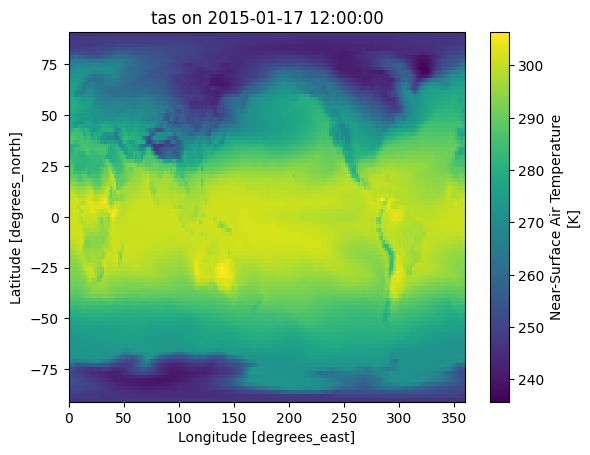

In [16]:
import json
import fsspec
import xarray as xr
import matplotlib.pyplot as plt

# Step 1: Load local GeoCroissant metadata JSON
with open("ceda_cmip6_geocroissant.json", "r") as file:
    metadata = json.load(file)

# Step 2: Find the kerchunk reference file from the metadata
kerchunk_product = next(
    obj for obj in metadata["distribution"]["containedIn"]
    if "reference" in obj["name"].lower()
)

kerchunk_url = kerchunk_product["contentUrl"]

# Step 3: Open the kerchunked dataset via fsspec and xarray
fs = fsspec.filesystem("reference", fo=kerchunk_url, remote_protocol="https", remote_options={})
mapper = fs.get_mapper("")
ds = xr.open_dataset(mapper, engine="zarr", backend_kwargs={"consolidated": False})

# Step 4: Select the variable and time slice, then plot
tas = ds["tas"].sel(time="2015-01-17 12:00:00").squeeze()
tas.plot()
plt.title("tas on 2015-01-17 12:00:00")
plt.show()